In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
movies = pd.read_csv("fandango_score_comparison.csv")

In [2]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


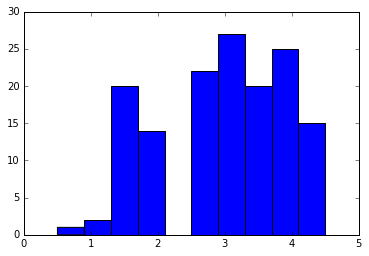

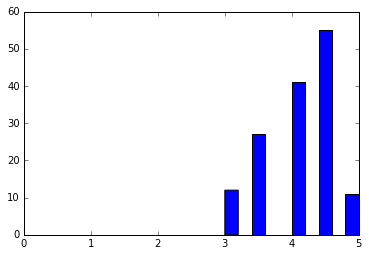

In [3]:
plt.hist(movies["Metacritic_norm_round"], bins=10)
plt.xlim(0,5)
plt.show()
plt.hist(movies["Fandango_Stars"], bins=10)
plt.xlim(0,5)
plt.show()

## Fandango: where the fans go

Immediately we notice that Fandango scores movies higher on average than Metacritic, which accepts reviews of all styles and scales.  In fact, no rating on Fandango falls below a 3, with the vast majority landing in the 4 to 4.5 range. It's important to note Fandango does not allow for the same granularity as Metacritic. That is, there is no 3.25 on Fandango. A movie is either 3 or 3.5 stars. Presumably a 3.25 would round up to a 3.5. And perhaps a 1 rounds up to a 3?

Before moving on, we should note that Fandango ratings display only one peak and a strong left skew, whereas Metacritic ratings appear more normally distributed. 

In [4]:
metacritic_mean = movies["Metacritic_norm_round"].mean()
metacritic_median = movies["Metacritic_norm_round"].median()
metacritic_stddev = movies["Metacritic_norm_round"].std()
fandango_mean = movies["Fandango_Stars"].mean()
fandango_median = movies["Fandango_Stars"].median()
fandango_stddev = movies["Fandango_Stars"].std()

In [5]:
print("Website \t Mean \t\t Median \t Standard Deviation")
print("Metacritic\t", metacritic_mean, '\t', metacritic_median, '\t\t', metacritic_stddev)
print("Fandango\t", fandango_mean, '\t', fandango_median, '\t\t', fandango_stddev)

Website 	 Mean 		 Median 	 Standard Deviation
Metacritic	 2.97260273973 	 3.0 		 0.990960561374
Fandango	 4.08904109589 	 4.0 		 0.540385977979


The median for Metacritic is a 3 out of 5, while the Fandango median is a 4. Fandango's mean is slightly larger than the median, implying a few large scores pulling the average value higher. Alternatively, Metacritic hs a mean just a bit lower than the median, implying there are a few extremely low scores relative to the total set pulling the average lower.

The standard deviation of Fandango scores is nearly half that of Metacritic, telling us that Metacritic sports twice as much spread in rating values. Additionally, the mean for all Fandango scores considered is over 1 point higher than the Metacritic mean. 

Our initial analysis is telling us Fandango scores are less variable and of a generally higher value than Metacritic. [Metacritic's methodology](http://www.metacritic.com/about-metascores) uses a weighted average, giving more value to more prominent critics and publications. It also considers review quality, and normalizes scores to an extent in order to avoid clumping ratings. They adjust letter grade and 4-star ratings based on a published scale. Given that Fandango's methodology is unpublished, one becomes skeptical of the obvious skew in their ratings. It's seems likely that they are artificially increasing movie values, which would likely help them sell more tickets.

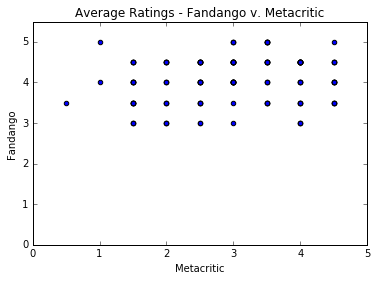

(146, 22)

In [6]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.xlim(0,5)
plt.ylim(0,5.5)
plt.title("Average Ratings - Fandango v. Metacritic")
plt.xlabel("Metacritic")
plt.ylabel("Fandango")
plt.show()
movies.shape

In [7]:
movies['fm_diff'] = abs(movies["Fandango_Stars"] - movies["Metacritic_norm_round"])
movies.sort_values('fm_diff', axis=0, ascending=False, inplace=True)
print(movies.loc[:,['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                       'Metacritic_norm_round', 'Metacritic_user_norm_round',
                       'fm_diff']].head())

                        FILM  Fandango_Stars  Fandango_Ratingvalue  \
3     Do You Believe? (2015)             5.0                   4.5   
85         Little Boy (2015)             4.5                   4.3   
47              Annie (2014)             4.5                   4.2   
19             Pixels (2015)             4.5                   4.1   
134  The Longest Ride (2015)             4.5                   4.5   

     Metacritic_norm_round  Metacritic_user_norm_round  fm_diff  
3                      1.0                         2.5      4.0  
85                     1.5                         3.0      3.0  
47                     1.5                         2.5      3.0  
19                     1.5                         2.5      3.0  
134                    1.5                         2.5      3.0  


In [9]:
from scipy import stats

r_value = stats.pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print('r-value: ', r_value[0])

r-value:  0.178449190739


The r-value between Fandango and Metacritic ratings is relatively low. The movies with the highest rating at Fandango are not necessarily highly rated at Metacritic. As Metacritic takes an aggregate of numerous critics, this makes me think Fandango is purposeful about which movies receive abnormally high ratings. It could also mean that Fandango pulls from a smaller pool of critics, or if they have their own review team it could simply show us the effects of small vs. large sample sizes.

In [15]:
linear_regression = stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print(linear_regression)

LinregressResult(slope=0.09731107797392835, intercept=3.7997739188994188, rvalue=0.17844919073895896, pvalue=0.031161516228524269, stderr=0.044713544656798297)


In [18]:
pred_3 = 3*0.097 + 3.8
pred_1 = 0.097 + 3.8
pred_5 = 5*0.097 + 3.8
print('''Predicted Fandango Scores Based on Metacritic:
        Metacritic \t Fandango
        1 \t\t {0}
        3 \t\t {1}
        5 \t\t {2}'''.format(pred_1, pred_3, pred_5))

Predicted Fandango Scores Based on Metacritic:
        Metacritic 	 Fandango
        1 		 3.897
        3 		 4.091
        5 		 4.285


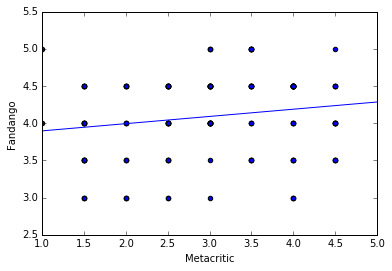

In [21]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim(1, 5)
plt.xlabel("Metacritic")
plt.ylabel("Fandango")
plt.show()